<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.04

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.





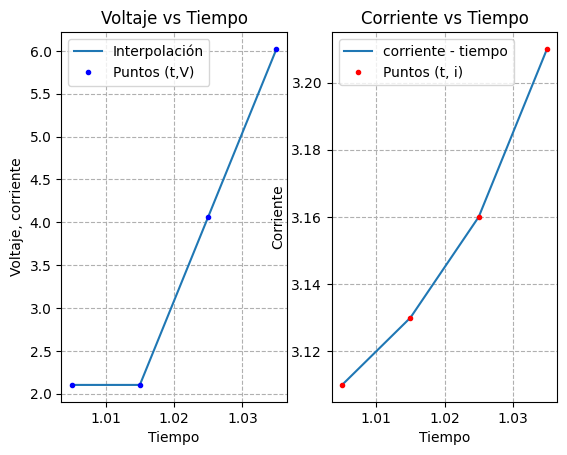

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Condiciones iniciales
L = 0.98
R = 0.142
dic = {"t": [1.00, 1.01, 1.02, 1.03, 1.04],
       "i":[3.10, 3.12, 3.14, 3.18, 3.24]}
df = pd.DataFrame(dic)

def derivada(x,y):
  return  np.diff(y)/np.diff(x)

def promedio(x, redondeo):
   prom = np.array(x[0:len(x)-1]) + np.array(x[1:len(x)])
   prom = np.round(prom/2, redondeo)
   return prom

df_res = pd.DataFrame()
df_res["derivada"] = derivada(df.t, df.i)
df_res["i_promedio"] = promedio(df.i, 2)
df_res["t_promedio"] = promedio(df.t, 3)

fem_prom = (L*df_res.derivada) + R
df_res["fem_promedio"] = fem_prom
fig, axs = plt.subplots(1,2)
axs[0].set_title("Voltaje vs Tiempo")
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("Voltaje, corriente")
axs[0].plot(df_res.t_promedio, df_res.fem_promedio, label="Interpolación")
axs[0].plot(df_res.t_promedio, df_res.fem_promedio, "b.", label="Puntos (t,V)")
axs[0].grid(linestyle="--")
axs[0].legend()


axs[1].set_title("Corriente vs Tiempo")
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("Corriente")
axs[1].plot(df_res.t_promedio, df_res.i_promedio, label="corriente - tiempo")
axs[1].plot(df_res.t_promedio, df_res.i_promedio, "r.", label="Puntos (t, i)")
axs[1].grid(linestyle="--")
axs[1].legend()



# Parte 2

**1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.**




La integral de una función se define como el área de debajo de una curva, evaluada en un rango $[a,b]$, si se hace aproximación inicial armando el trapecio con una línea que une los puntos entre $a$ y $b$ por lo que el área de la curva sería:

$$\int_{a}^{b}f(x)dx \approx f(a)(b-a) + \frac{(b-a)(f(b)-f(a))}{2} = (b-a)\left(f(a) + \frac{(f(b)-f(a))}{2}\right)$$
 $$=(b-a)\left(\frac{f(a)}{2}-\frac{f(b)}{2}\right) = \frac{(b-a)}{2}(f(a)+f(b))$$

$$\int_{a}^{b}f(x)dx \approx \frac{(b-a)}{2}(f(a)+f(b))$$

Si decimos que $h = (b-a)$:
$$\int_{a}^{b}f(x)dx \approx \frac{h}{2}(f(a)+f(b))$$

si ahora se toman 3 puntos:

$$\int_{a}^{b}f(x)dx \approx f(a)(x_1-a) + \frac{(x_1-a)(f(x_1)-f(a))}{2} + \frac{(b-x_1)(f(b)-f(x_1))}{2} + f(x_1)(b-x_1)$$


como los pasos se dibiden en tamaños equidistantes, $(b-x_1) = (x_1-a) = \frac{b-a}{n} = h $ donde n es es el número de trapecios que se usarán para aproximar a la integral:


$$\int_{a}^{b}f(x)dx \approx f(a)h + \frac{h(f(x_1)-f(a))}{2} + \frac{h(f(b)-f(x_1))}{2} + f(x_1)h$$

$$ = f(a)h + \frac{hf(x_1)}{2} - \frac{hf(a)}{2} + \frac{hf(b)}{2} - \frac{hf(x_1)}{2} + f(x_1)h$$

$$ = \frac{hf(a)}{2} + \frac{hf(b)}{2} + f(x_1)h$$

$$ = \frac{h}{2}\left[f(a) + f(b) + 2f(x_1)\right]$$

esto para n = 2, podemos ver que estos son los valores que sobreviven ya que si n = 3

$$\int_{a}^{b}f(x)dx \approx \frac{h}{2}\left[f(a) + f(b) + 2f(x_1) + 2f(x_2)\right]$$

Generalizando con $n = n$; con $h = \frac{b-a}{n}$

$$\int_{a}^{b}f(x)dx \approx \frac{h}{2}\left[f(a) + f(b) + 2f(x_1) + ... + 2f(x_{n-1})\right]$$

$$\int_{a}^{b}f(x) \approx \frac{h}{2}[f(a)+f(b) + 2\sum_{i = 1}^{n-1}f(x_{i})]$$

\begin{equation}
\int_{a}^{b}f(x) \approx \frac{h}{2}[f(a)+f(b) + 2\sum_{i = 1}^{n-1}f(x_{i})]
\end{equation}


**2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson**

La deducción completa de esta integral se encuentra en la actividad 08 en el archivo "Actividad_08_integración regla de simpson.ipynb"

Para la integración de simpson, se considera la aproximación de la función $f(x)$ como un polinomio de orden 2, en un rango $[a,b]$ y el valor medio entre estos $m=\frac{a+b}{2}$ y usando el polinomio de lagrange para 3 puntos

Fórmula de la regla de Simpson:

$$\int_{a}^{b}f(x)dx \approx \int_{a}^{b}P(x)dx = \frac{(b-a)}{6}\left(f(a) +  4f(\frac{a+b}{2}) + f(b)\right)$$

Fórmula de la regla de Simpson 1/3 compuesta:
$$\int_{a}^{b}f(x)dx \approx \int_{a}^{b}P(x)dx = \frac{h}{3}\left(f(x_0) +  4\sum_{i = 1}^{\frac{n}{2}}f(x_{2i}) + 2\sum_{i = 1}^{\frac{n}{2}-1}f(x_{2i}) + f(x_n)\right)$$

Donde h es el paso entre $x_i$ y $x_{i+1}$; $h = \frac{(x_n - x_0)}{n}$


**3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.**

Para dos puntos

$$\int_{a}^{b}f(x)dx \approx \frac{b-a}{2}\sum_{i = 1}^{n}w_if(x_i)$$



Para el caso general:
$$\int_{a}^{b}f(x)dx \approx \frac{b-a}{2}\sum_{i = 1}^{n}w_if \left( \frac{b-a}{2}y_i + \frac{a+b}{2} \right)$$

Donde $w_i = \frac{2}{(1-x_i^2)(P_n'(x_i))^2}$; donde ${\displaystyle P_{n}}$ es el polinomios de Legendre de grado $n$

4. **Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales
garantizando  que el error sea menor a $\varepsilon=1E-5$.**   





Empezar primero con una integral sencilla como

$$f(x) = \int_{0+ϵ}^{2} x^2 dx = \frac{x^3}{3} =  \frac{27}{3} = 9$$

In [ ]:
import scipy.integrate as intg
import numpy as np

In [ ]:
def trapecio(f,a,b,n = 10, args=None):
  n = int(n)
  h = (b-a)/n
  xi = np.linspace(a+h,b-h,n-1)
  if args != None:
    integral = (h/2)*(f(a,args)+f(b,args) + 2*np.sum(f(xi,args)))
  else:
    integral = (h/2)*(f(a)+f(b) + 2*np.sum(f(xi)))
  return integral


In [ ]:
def simpson(f,a,b,n=10):
  if(n % 2) != 0:
    n += 1
  h = (b-a)/n
  x = np.linspace(a,b,n+1)
  x2j = x[2:n:2]
  x2j_1 = x[1:n:2]
  y2j = f(x2j)
  y2j_1 = f(x2j_1)
  integral = (h/3)*(f(a)+2*y2j.sum()+4*y2j_1.sum()+f(b))
  return integral

In [ ]:
f = lambda x: x**2
epsilon = 1E-10
a = 0
b = 3
n = 1000000
x = np.linspace(a,b,n)
y = f(x)
intTrapecio = trapecio(f,a,b,n)
integralT = intg.trapezoid(y,x)
print("El valor de la integral real es 9, regla del trapecio por scipy: ", integralT, ", por método creado: ", intTrapecio)
intSimpson = simpson(f,a,b,n)
integralS = intg.simpson(y,x)
print("El valor de la integral real es 9, regla de simpson por scipy: ", integralS, ", por método creado: ", intSimpson)
integralG = intg.quad(f,a,b)[0]
print("El valor de la integral real es 9, regla de cuadratura Gaussiana por scipy: ", integralG)

El valor de la integral real es 9, regla del trapecio por scipy:  9.0000000000045 , por método creado:  9.000000000004498
El valor de la integral real es 9, regla de simpson por scipy:  9.0 , por método creado:  9.000000000000002
El valor de la integral real es 9, regla de cuadratura Gaussiana por scipy:  9.000000000000002


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$




In [ ]:
f = lambda x: 1/(np.sqrt(np.tan(x)))
epsilon = 1E-10
a = 0+epsilon
b = (np.pi)/2
n = 10000000
x = np.linspace(a,b,n)
y = f(x)
intTrapecio = trapecio(f,a,b,n)
integralT = intg.trapezoid(y,x)
print("Regla del trapecio por scipy: ", integralT, ", por método creado: ", intTrapecio)
intSimpson = simpson(f,a,b,n)
integralS = intg.simpson(y,x)
print("Regla de simpson por scipy: ", integralS, ", por método creado: ", intSimpson)
integralG = intg.quad(f,a,b)[0]
print("Regla de cuadratura Gaussiana por scipy: ", integralG)

Regla del trapecio por scipy:  2.2287163356796214 , por método creado:  2.228716334923143
Regla de simpson por scipy:  2.2261782231009897 , por método creado:  2.226178222604681
Regla de cuadratura Gaussiana por scipy:  2.2214414690939464


- $$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


In [ ]:
f = lambda x: 1/(1+(x**2))
epsilon = 1E-10
a = -np.inf
b = np.inf
integralG = intg.quad(f,a,b)[0]
print("Regla de cuadratura Gaussiana por scipy: ", integralG)

Regla de cuadratura Gaussiana por scipy:  3.141592653589793


- $$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

In [ ]:
import sympy as sp

x = sp.symbols("x")
y = sp.symbols("y")

f_x_y = 2*y * sp.sin(x) + sp.cos(x)**2
integr = sp.integrate(f_x_y,y)
integr

y**2*sin(x) + y*cos(x)**2

In [ ]:
fun = lambda x,y: (2*y*np.sin(x))+np.cos(x)**2

In [ ]:
x_ = np.linspace(0,np.pi/4,100)
Int_t = np.zeros(len(x_))
Int_s = np.zeros(len(x_))
Int_q = np.zeros(len(x_))
for i in range(0,len(x_)-1):
  y_ = np.linspace(np.sin(x_[i]),np.cos(x_[i]),len(x_))
  f = fun(x_[i],y_)
  Int_t[i] = intg.trapezoid(f, y_, dx=1E-5)
  Int_s[i] = intg.simpson(f, y_, dx=1E-5)



I_trap = intg.trapezoid(Int_t, x_, dx=1E-5)
I_simp = intg.simpson(Int_s, x_, dx=1E-5)


print("Integral por regla del trapecio : ", I_trap)
print("Integral por regla de simpson : ", I_simp)


Integral por regla del trapecio :  0.5118335093392186
Integral por regla de simpson :  0.5118446374265215


**5. Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:**

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta_0),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta_0)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exact de la integral mostrado en el punto 5.

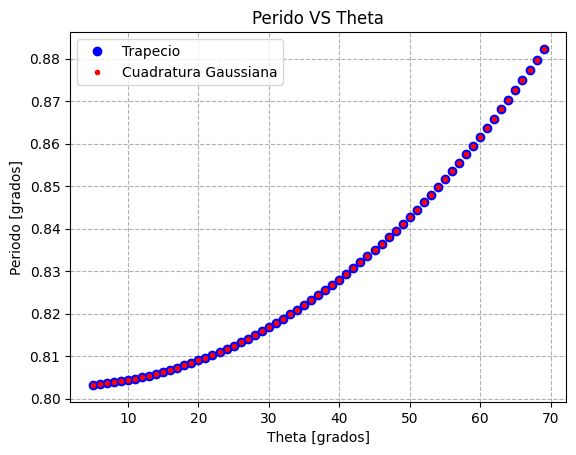

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

m = 0.002   #masa
d = 0.06    #diametro de la esfera
b = 0.15    #longitud
theta0 = np.arange(5,70,1)

f_integral = lambda phi, k: 1/np.sqrt((1-((k**2)*np.sin(phi)**2)))

def I0_esferaSolida(m,d):
  return (2/5)*m*d

def P0(I0,m,b):
  P0 = 2*np.pi*np.sqrt(I0/(m*9.8*b))
  return P0

def periodo(theta0_arr,I0,m,b,d):
  theta0_arr = np.deg2rad(theta0_arr)
  p0 = P0(I0,m,b)
  p = np.zeros(len(theta0_arr))
  p_trap = np.zeros(len(theta0_arr))
  for i in range(0,len(theta0_arr)):
    k = np.sin(theta0_arr[i]/2)
    integral_quad = intg.quad(f_integral, 0, (np.pi/2), args = k)[0]
    p[i] = (2*p0/np.pi)*integral_quad
    integral_trapecio = trapecio(f_integral, 0, (np.pi/2),100, args = k)
    p_trap[i] = (2*p0/np.pi)*integral_trapecio
  return p, p_trap


I0 = I0_esferaSolida(m,d)

p, pt = periodo(theta0,I0,m,b,d)

plt.plot(theta0,pt,"bo", label="Trapecio ")
plt.plot(theta0,p,"r.", label="Cuadratura Gaussiana")
plt.title("Perido VS Theta")
plt.xlabel("Theta [grados]")
plt.ylabel("Periodo [grados]")
plt.grid(linestyle="--")
plt.legend()



In [ ]:
f = lambda phi, k: 1/np.sqrt((1-((k**2)*np.sin(phi)**2)))

@np.vectorize
def periodo(m, b, I0, theta0):
  k = np.sin(theta0/2)
  integr = sc.integrate.quad(f_integral,0,(np.pi/2), args=(k))
  P0 = 2*np.pi*np.sqrt(I0/(m*9.8*b))
  p = (2*P0/np.pi)*integr[0]
  return p

theta0_ = np.deg2rad(np.linspace(0,60,60))
p = periodo(m, b, I0, theta0_)
p = np.array(p)
p

array([0.80283597, 0.80285178, 0.8028992 , 0.80297826, 0.80308896,
       0.80323133, 0.80340541, 0.80361122, 0.80384881, 0.80411824,
       0.80441957, 0.80475285, 0.80511817, 0.80551559, 0.80594522,
       0.80640714, 0.80690146, 0.80742828, 0.80798771, 0.8085799 ,
       0.80920495, 0.80986302, 0.81055425, 0.8112788 , 0.81203682,
       0.81282849, 0.81365399, 0.8145135 , 0.81540721, 0.81633534,
       0.8172981 , 0.8182957 , 0.81932837, 0.82039636, 0.82149992,
       0.82263929, 0.82381476, 0.82502659, 0.82627508, 0.82756052,
       0.82888322, 0.8302435 , 0.83164169, 0.83307813, 0.83455317,
       0.83606718, 0.83762053, 0.83921362, 0.84084683, 0.84252059,
       0.84423532, 0.84599147, 0.84778948, 0.84962983, 0.85151299,
       0.85343948, 0.8554098 , 0.85742447, 0.85948406, 0.86158912])

5. (No se resulve)The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}



$m_1 = 1-m$,

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->


7 (No se resulve)Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large